In [2]:
import pandas as pd
import numpy as np
import glob

In [1]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=a0952c80bd1d3e3ecc546299e9042299fcaa26e59f83c742588cf279c27717c0
  Stored in directory: c:\users\16477\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\16477\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
na_train_df.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,num_class
0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,-1.0
1,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,-1.0
2,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,-1.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,-1.0
4,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,-1.0


## Data Cleaning and Processing

In [10]:
train_df = pd.read_csv("aps_failure_training_set.csv")
test_df = pd.read_csv("aps_failure_test_set.csv")
na_train_df = train_df.replace('na', np.nan, regex=True)
na_test_df = test_df.replace('na', np.nan, regex=True)


na_train_df['num_class'] = np.where(na_train_df['class'] == "pos", 1, -1)
na_test_df['num_class'] = np.where(na_test_df['class'] == "pos", 1, -1)

del na_train_df['class']
del na_test_df['class']

na_train_df = na_train_df.astype("float64")

## Set Up Data Processing Pipeline

In [33]:
na_train_df_na_fill = na_train_df.fillna(na_train_df.mode().iloc[0])
na_test_df_na_fill = na_test_df.fillna(na_test_df.mode().iloc[0])

Y_train = na_train_df_na_fill['num_class']
Y_test = na_test_df_na_fill['num_class']

x_train = na_train_df_na_fill.loc[:, na_train_df_na_fill.columns != 'num_class']
x_test = na_test_df_na_fill.loc[:, na_test_df_na_fill.columns != 'num_class']


numerical_features = []
categorical_features = []
binary_features = []
univariate_features = []
total_len = len(x_train.columns.values)
for colname in x_train.columns.values:
    if len(np.unique(x_train[colname].to_list())) == 2:
        binary_features.append(colname)
    elif len(np.unique(x_train[colname].to_list())) < 2:
        univariate_features.append(colname)
    elif 2 < len(np.unique(x_train[colname].to_list())) <= 47:
        categorical_features.append(colname)
    else:
        numerical_features.append(colname)

In [39]:
x_test[categorical_features+binary_features+univariate_features].head(n=10)

,ab_000,as_000,dz_000,ef_000,ch_000,cd_000
0,0,0,0,0,0,1209600
1,0,0,0,0,0,1209600
2,2,0,0,0,0,1209600
3,0,0,0,0,0,1209600
4,0,0,0,0,0,1209600
5,0,0,0,0,0,1209600
6,0,0,0,0,0,1209600
7,0,0,0,0,0,1209600
8,0,0,0,0,0,1209600
9,0,0,0,0,0,1209600


In [ ]:
!conda install matplotlib --force

In [42]:
import seaborn as sns

sns.displot(x_test, x="ag_004", bins=20)

ModuleNotFoundError: No module named 'matplotlib.artist'

In [33]:
from sklearn import preprocessing

x_train_num_features = x_train[numerical_features]
x_test_num_features = x_test[numerical_features]

scaler = preprocessing.StandardScaler().fit(x_train_num_features)
x_train_num = pd.DataFrame(scaler.transform(x_train_num_features), columns = numerical_features)
x_test_num =  pd.DataFrame(scaler.transform(x_test_num_features), columns = numerical_features)

In [34]:
x_train_num.shape

(60000, 163)

### Preprocess Numerical Features

In [35]:
def categorical_process(data_frame, cat_name):
    data_frame[cat_name] = data_frame[cat_name].astype('category')
    dummy_df = pd.get_dummies(data_frame[cat_name])
    dummy_df.columns = [*map(lambda t: str(cat_name) + str(t), list(dummy_df.columns.values))]
    return dummy_df

for cat in categorical_features:
    temp_df = categorical_process(na_train_df_na_fill, cat)
    x_train_num = pd.concat([x_train_num,temp_df], axis=1)
    
for cat in categorical_features:
    temp_df = categorical_process(na_test_df_na_fill, cat)
    x_test_num = pd.concat([x_test_num,temp_df], axis=1)
    
# Get missing columns in the training test
missing_cols = set(x_train_num.columns ) - set(x_test_num.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test_num[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
x_test_num = x_test_num[x_train_num.columns]

In [36]:
x_train_num[binary_features] = x_train[binary_features]
x_test_num[binary_features] = x_test[binary_features]

x_train = x_train_num
x_train.shape

(60000, 338)

In [37]:
x_test_num

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,eg_00072,eg_00078,eg_0008,eg_00080,eg_00086,eg_000892,eg_000910,eg_00092,eg_00094,ch_000
0,-0.407598,-0.432859,-0.004092,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.112102,-0.181025,...,0,0,0,0,0,0,0,0,0,0
1,-0.407447,-0.432859,-0.004091,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.182714,...,0,0,0,0,0,0,0,0,0,0
2,0.045833,-0.432859,-0.004089,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,0.147701,0.392280,...,0,0,0,0,0,0,0,0,0,0
3,0.003297,-0.432858,-0.004065,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.130553,...,0,0,0,0,0,0,0,0,0,0
4,-0.395537,-0.432859,-0.004088,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.183000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.154821,2.310224,-0.004067,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.180708,...,0,0,0,0,0,0,0,0,0,0
15996,-0.407887,-0.432859,-0.004091,0.009264,0.075233,-0.010762,-0.02837,-0.056929,-0.115643,-0.180302,...,0,0,0,0,0,0,0,0,0,0
15997,0.139584,-0.432857,-0.004049,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.176652,...,0,0,0,0,0,0,0,0,0,0
15998,-0.407254,-0.432859,-0.004091,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.182947,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x_test_num['ch_000'] = x_test_num['ch_000'].astype('int32')
x_train = x_train_num

## Modeling

I used logistic regression, classification tree, 

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x_train, Y_train, 
                                                    test_size=0.2, random_state=0)

oversample = SMOTE(random_state=42)

os_data_X,os_data_y=oversample.fit_resample(X_train.to_numpy(), y_train.to_numpy())
X_train_smote = pd.DataFrame(data=os_data_X,columns=X_train.columns)
y_train_smote= pd.DataFrame(data=os_data_y,columns=['num_class'])

### Logistic Regression

In [40]:
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X_train_smote, y_train_smote.values.ravel())


print(logreg.score(x_test, Y_test))

y_pred = logreg.predict_proba(x_test)
y_true = Y_test


y_scores = y_pred[:, -1:]
print("AUC of logistic regression is {}".format(roc_auc_score(y_true, y_scores)))
print(confusion_matrix(y_true, logreg.predict(x_test)))

fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_scores)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw,)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression example')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [16000, 60000]

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = XGBClassifier()
model.fit(X_train_smote, y_train_smote.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

AUC: 0.9861131553383768
[[11771    45]
 [   32   152]]


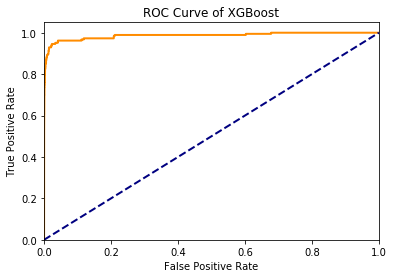

In [25]:
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:,1]

y_true = y_test

print("AUC: {}".format(roc_auc_score(y_true, y_scores)))
# print(confusion_matrix(y_true, logreg.predict(X_test)))

print(confusion_matrix(y_true, y_pred))

fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_scores)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw,)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.show()

In [19]:
import numpy as np
confusion_matrix = np.array([[15530  ,  95],
 [   57  ,    318]]
)
TP = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
TN = confusion_matrix[1,1]

In [20]:
sensitivity = np.round(TP/(TP+FN), 3)
specificity = np.round(TN/(TN+FP), 3)
precision = np.round(TP/(TP+FP), 3)
f1_score = np.round(2*TP/(2*TP+FP+FN), 3)
print(sensitivity, specificity, precision, f1_score)

0.996 0.77 0.994 0.995


15241